<a href="https://colab.research.google.com/github/virtualfarhan/IIITH-PROJECTS/blob/main/Introduction_to_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing the required libraries

import numpy as np
import matplotlib.pyplot as plt
import random

In [20]:
import numpy as np
import matplotlib.pyplot as plt

def eval_5th_degree(coeffs, x):
    """
    Function to return the output of evaluating a fifth degree polynomial,
    given a specific x value.

    Args:
        coeffs: List containing the coefficients a, b, c, d, e, and f for the polynomial.
        x: The input x value to the polynomial.

    Returns:
        y: The corresponding output y value for the fifth degree polynomial.

    """
    a = coeffs[0] * (x ** 5)
    b = coeffs[1] * (x ** 4)
    c = coeffs[2] * (x ** 3)
    d = coeffs[3] * (x ** 2)
    e = coeffs[4] * x
    f = coeffs[5]
    y = a + b + c + d + e + f
    return y

hundred_xs = np.random.uniform(-10, 10, 100)
# Adjust coefficients for a polynomial with two minima
coeffs = [1, -4, 3, 2, -1, 0]

xs = []
ys = []
for x in hundred_xs:
    y = eval_5th_degree(coeffs, x)
    xs.append(x)
    ys.append(y)

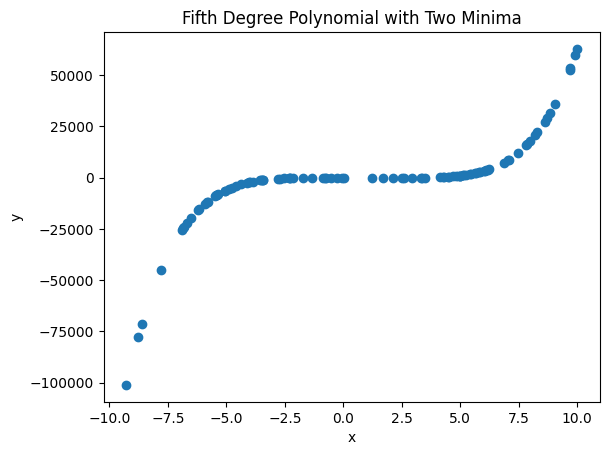

In [21]:
plt.scatter(xs, ys)
plt.title("Fifth Degree Polynomial with Two Minima")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [60]:
import numpy as np
import random
import matplotlib.pyplot as plt

def eval_5th_degree(coeffs, x):
    """
    Function to return the output of evaluating a fifth degree polynomial,
    given a specific x value.

    Args:
        coeffs: List containing the coefficients a, b, c, d, e, and f for the polynomial.
        x: The input x value to the polynomial.

    Returns:
        y: The corresponding output y value for the fifth degree polynomial.
    """
    a = coeffs[0] * (x ** 5)
    b = coeffs[1] * (x ** 4)
    c = coeffs[2] * (x ** 3)
    d = coeffs[3] * (x ** 2)
    e = coeffs[4] * x
    f = coeffs[5]
    y = a + b + c + d + e + f
    return y

def eval_5th_degree_jitter(coeffs, x, j):
    """
    Function to return the noisy output of evaluating a fifth degree polynomial,
    given a specific x value. Output values can be within [y − j, y + j].

    Args:
        coeffs: List containing the coefficients a, b, c, d, e, and f for the polynomial.
        x: The input x value to the polynomial.
        j: Jitter parameter, to introduce noise to output y.

    Returns:
        y: The corresponding jittered output y value for the fifth degree polynomial.
    """
    y = eval_5th_degree(coeffs, x)
    interval = [y - j, y + j]
    jit_val = random.uniform(interval[0], interval[1])
    return jit_val

hundred_xs = np.random.uniform(-10, 10, 100)
coeffs = [1, -2, 3, 4, -5, 6]

xs = []
ys = []
for x in hundred_xs:
    y = eval_5th_degree_jitter(coeffs, x, 10)  # Adjust jitter value here
    xs.append(x)
    ys.append(y)

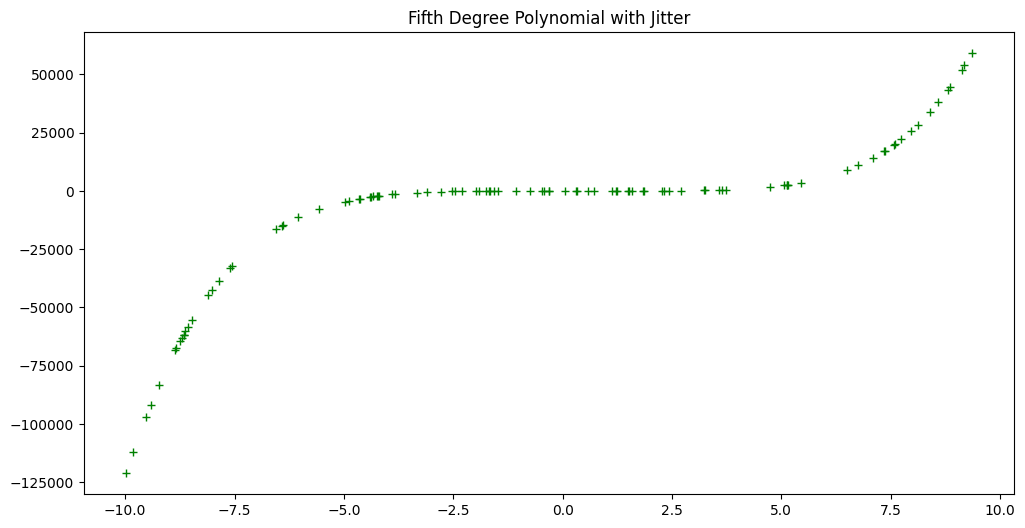

In [61]:
plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+')
plt.title('Fifth Degree Polynomial with Jitter')
plt.show()

In [63]:
import numpy as np
import random
import matplotlib.pyplot as plt

def eval_5th_degree(coeffs, x):
    """
    Function to return the output of evaluating a fifth degree polynomial,
    given a specific x value.

    Args:
        coeffs: List containing the coefficients a, b, c, d, e, and f for the polynomial.
        x: The input x value to the polynomial.

    Returns:
        y: The corresponding output y value for the fifth degree polynomial.
    """
    a = coeffs[0] * (x ** 5)
    b = coeffs[1] * (x ** 4)
    c = coeffs[2] * (x ** 3)
    d = coeffs[3] * (x ** 2)
    e = coeffs[4] * x
    f = coeffs[5]
    y = a + b + c + d + e + f
    return y

def loss_mse(ys, y_bar):
    """
    Calculates MSE loss.

    Args:
        ys: training data labels
        y_bar: prediction labels

    Returns: Calculated MSE loss.
    """
    return sum((ys - y_bar) ** 2) / len(ys)

In [64]:
def plot_predictions(coeffs, xs, ys):
    y_bar = [eval_5th_degree(coeffs, x) for x in xs]
    plt.figure(figsize=(12, 6))
    plt.plot(xs, ys, 'g+', label='Original')
    plt.plot(xs, y_bar, 'ro', label='Prediction')
    plt.title('Original data vs prediction')
    plt.legend(loc="lower right")
    plt.show()

In [65]:
# Generate data points
hundred_xs = np.random.uniform(-10, 10, 100)
coeffs_1 = [1, -2, 3, 4, -5, 6]  # Coefficients of the 5th-degree polynomial with distinct roots
coeffs_2 = [-3, 2, 0, -1, 4, 6] # Another set of coefficients with distinct roots


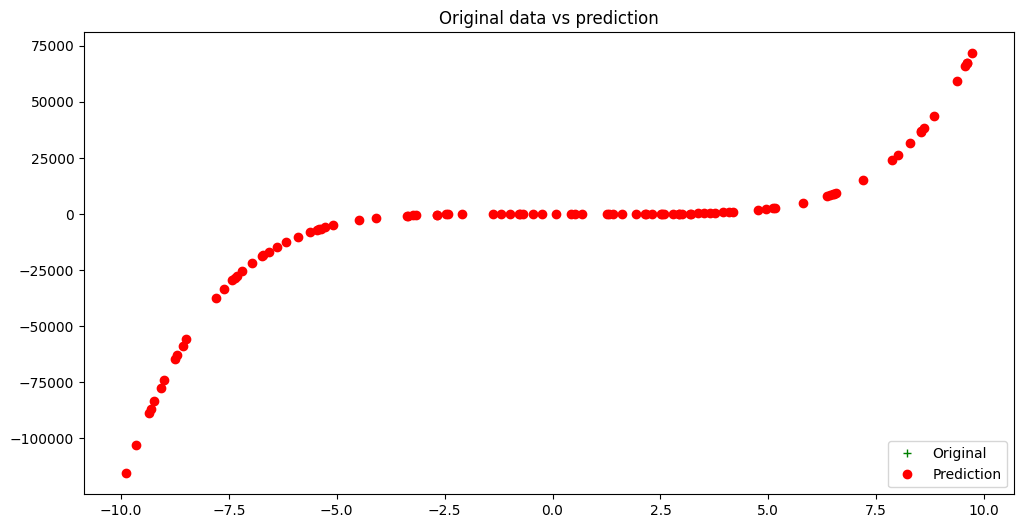

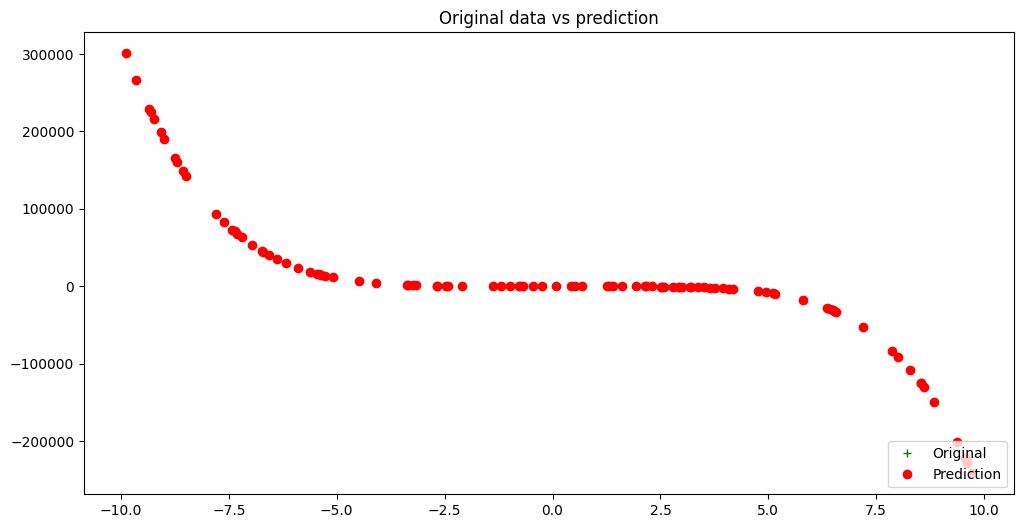

In [66]:
# Plot predictions for both sets of coefficients
plot_predictions(coeffs_1, hundred_xs, [eval_5th_degree(coeffs_1, x) for x in hundred_xs])
plot_predictions(coeffs_2, hundred_xs, [eval_5th_degree(coeffs_2, x) for x in hundred_xs])

In [67]:
def calc_gradient_5th_poly(rand_coeffs, hundred_xs, ys):
    """
    Calculates the gradient for a fifth degree polynomial to find its maximum.

    Args:
        rand_coeffs: Coefficients a, b, c, d, e, f for a 5th degree polynomial [ y = ax^5 + bx^4 + cx^3 + dx^2 + ex + f ]
        hundred_xs: x input datapoints
        ys: Actual y output points

    Returns:
        Calculated gradients for the 5th degree polynomial, as a tuple of its parts for a, b, c, d, e, f respectively.
    """

    a_s = []
    b_s = []
    c_s = []
    d_s = []
    e_s = []
    f_s = []

    y_bars = [eval_5th_degree(rand_coeffs, x) for x in hundred_xs]

    for x, y, y_bar in zip(hundred_xs, ys, y_bars):
        x_pow_5 = x ** 5
        x_pow_4 = x ** 4
        x_pow_3 = x ** 3
        x_pow_2 = x ** 2

        partial_a = x_pow_5 * (y - y_bar)
        a_s.append(partial_a)

        partial_b = x_pow_4 * (y - y_bar)
        b_s.append(partial_b)

        partial_c = x_pow_3 * (y - y_bar)
        c_s.append(partial_c)

        partial_d = x_pow_2 * (y - y_bar)
        d_s.append(partial_d)

        partial_e = x * (y - y_bar)
        e_s.append(partial_e)

        partial_f = (y - y_bar)
        f_s.append(partial_f)

    n = len(ys)

    gradient_a = (2 / n) * sum(a_s)
    gradient_b = (2 / n) * sum(b_s)
    gradient_c = (2 / n) * sum(c_s)
    gradient_d = (2 / n) * sum(d_s)
    gradient_e = (2 / n) * sum(e_s)
    gradient_f = (2 / n) * sum(f_s)

    return (gradient_a, gradient_b, gradient_c, gradient_d, gradient_e, gradient_f)

In [68]:
# Other parts of your existing code remain the same from the previous implementation
# ...
# ...

lr = 0.0001  # Learning rate
coeffs_5th = [1, -2, 3, 4, -5, 6]  # Coefficients of the 5th-degree polynomial

calc_grad = calc_gradient_5th_poly(coeffs_5th, hundred_xs, ys)
# Other parts of your existing code remain the same from the previous implementation
# ...
# ...

lr = 0.0001  # Learning rate
coeffs_5th = [1, -2, 3, 4, -5, 6]  # Coefficients of the 5th-degree polynomial

calc_grad = calc_gradient_5th_poly(coeffs_5th, hundred_xs, ys)


In [69]:
# Update coefficients by moving in the direction of the maximum
new_coeffs = [
    coeffs_5th[i] + lr * calc_grad[i] for i in range(len(coeffs_5th))
]

In [71]:
# Evaluate the polynomial with updated coefficients
new_y_bar = [eval_5th_degree(new_coeffs, x) for x in hundred_xs]

In [74]:
def loss_mse(ys, y_bar):
    """
    Calculates MSE loss.

    Args:
        ys: training data labels
        y_bar: prediction labels

    Returns: Calculated MSE loss.
    """
    squared_errors = [(y - y_pred) ** 2 for y, y_pred in zip(ys, y_bar)]
    return sum(squared_errors) / len(ys)

In [75]:
# Update coefficients by moving in the direction of the maximum
new_coeffs = [
    coeffs_5th[i] + lr * calc_grad[i] for i in range(len(coeffs_5th))
]

In [76]:
# Evaluate the polynomial with updated coefficients
new_y_bar = [eval_5th_degree(new_coeffs, x) for x in hundred_xs]

In [78]:
# Compute loss with updated coefficients
updated_model_loss = loss_mse(ys, new_y_bar)

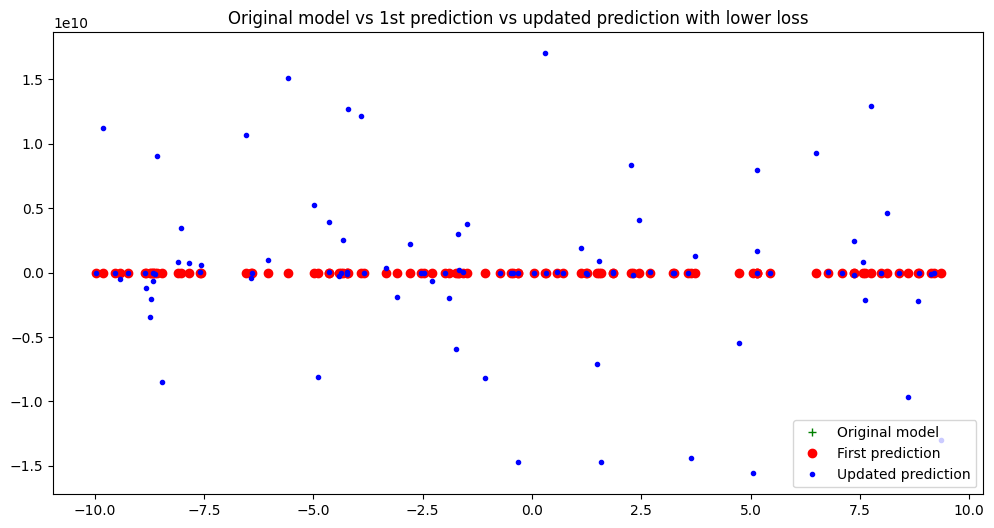

In [79]:
# Plot the original, first prediction, and updated prediction
plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+', label='Original model')
plt.plot(xs, y_bar, 'ro', label='First prediction')
plt.plot(xs, new_y_bar, 'b.', label='Updated prediction')
plt.title('Original model vs 1st prediction vs updated prediction with lower loss')
plt.legend(loc="lower right")
plt.show()

In [80]:
def calc_gradient_5th_poly_for_GD(coeffs, inputs_x, outputs_y, lr):
    """
    Calculates the gradient for a fifth degree polynomial for Gradient Descent.

    Args:
        coeffs: Coefficients a, b, c, d, e, f for a 5th degree polynomial [ y = ax^5 + bx^4 + cx^3 + dx^2 + ex + f ]
        inputs_x: x input datapoints
        outputs_y: actual y output points
        lr: learning rate

    Returns: Tuple containing (updated_model_loss, new_model_coeffs, new_y_bar predictions)
    """
    a_s = []
    b_s = []
    c_s = []
    d_s = []
    e_s = []
    f_s = []

    y_bars = [eval_5th_degree(coeffs, x) for x in inputs_x]

    for x, y, y_bar in zip(inputs_x, outputs_y, y_bars):
        x_pow_5 = x ** 5
        x_pow_4 = x ** 4
        x_pow_3 = x ** 3
        x_pow_2 = x ** 2

        partial_a = x_pow_5 * (y - y_bar)
        a_s.append(partial_a)

        partial_b = x_pow_4 * (y - y_bar)
        b_s.append(partial_b)

        partial_c = x_pow_3 * (y - y_bar)
        c_s.append(partial_c)

        partial_d = x_pow_2 * (y - y_bar)
        d_s.append(partial_d)

        partial_e = x * (y - y_bar)
        e_s.append(partial_e)

        partial_f = (y - y_bar)
        f_s.append(partial_f)

    n = len(outputs_y)

    gradient_a = (2 / n) * sum(a_s)
    gradient_b = (2 / n) * sum(b_s)
    gradient_c = (2 / n) * sum(c_s)
    gradient_d = (2 / n) * sum(d_s)
    gradient_e = (2 / n) * sum(e_s)
    gradient_f = (2 / n) * sum(f_s)

    a_new = coeffs[0] + lr * gradient_a
    b_new = coeffs[1] + lr * gradient_b
    c_new = coeffs[2] + lr * gradient_c
    d_new = coeffs[3] + lr * gradient_d
    e_new = coeffs[4] + lr * gradient_e
    f_new = coeffs[5] + lr * gradient_f

    new_model_coeffs = (a_new, b_new, c_new, d_new, e_new, f_new)

    # Update with these new coefficients:
    new_y_bar = [eval_5th_degree(new_model_coeffs, x) for x in inputs_x]

    updated_model_loss = loss_mse(outputs_y, new_y_bar)
    return updated_model_loss, new_model_coeffs, new_y_bar

In [81]:
def gradient_descent_5th_degree(epochs, lr):
    """
    Perform gradient descent for a fifth degree polynomial.

    Args:
        epochs: number of iterations
        lr: learning rate

    Returns: Tuple containing (updated_model_loss, new_model_coeffs, new_y_bar predictions, saved loss updates)
    """
    losses = []
    rand_coeffs_to_test = coeffs_5th  # Your initial coefficients for a 5th-degree polynomial
    for i in range(epochs):
        loss = calc_gradient_5th_poly_for_GD(rand_coeffs_to_test, hundred_xs, ys, lr)
        rand_coeffs_to_test = loss[1]
        losses.append(loss[0])
    return loss[0], loss[1], loss[2], losses  # (updated_model_loss, new_model_coeffs, new_y_bar, saved loss updates)


<ipython-input-74-5a96fd11f038>:11: RuntimeWarning: overflow encountered in double_scalars
  squared_errors = [(y - y_pred) ** 2 for y, y_pred in zip(ys, y_bar)]
<ipython-input-80-d4f1a0be1c16>:28: RuntimeWarning: overflow encountered in double_scalars
  partial_a = x_pow_5 * (y - y_bar)
<ipython-input-80-d4f1a0be1c16>:31: RuntimeWarning: overflow encountered in double_scalars
  partial_b = x_pow_4 * (y - y_bar)
<ipython-input-80-d4f1a0be1c16>:49: RuntimeWarning: invalid value encountered in double_scalars
  gradient_b = (2 / n) * sum(b_s)
<ipython-input-80-d4f1a0be1c16>:50: RuntimeWarning: overflow encountered in double_scalars
  gradient_c = (2 / n) * sum(c_s)


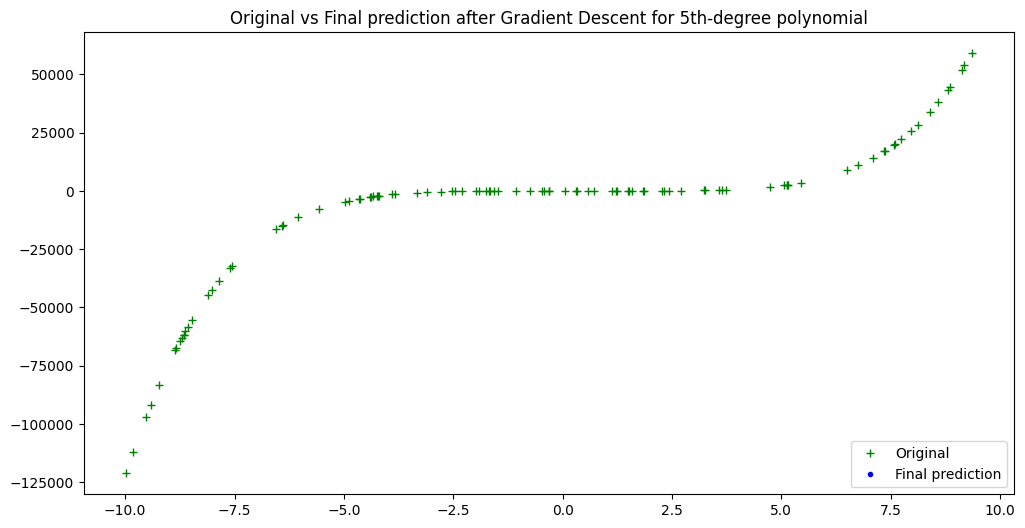

In [83]:
GD_5th_degree = gradient_descent_5th_degree(30000, 0.0003)
plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+', label='Original')
plt.plot(xs, GD_5th_degree[2], 'b.', label='Final prediction')
plt.title('Original vs Final prediction after Gradient Descent for 5th-degree polynomial')
plt.legend(loc="lower right")
plt.show()

In [84]:
print(f"Final Coefficients predicted: {GD[1]}")
print(f"Original Coefficients: {coeffs}")

Final Coefficients predicted: (1.0002552416983148, -0.00046321557679107216, -0.011296562270725482)
Original Coefficients: [1, -2, 3, 4, -5, 6]


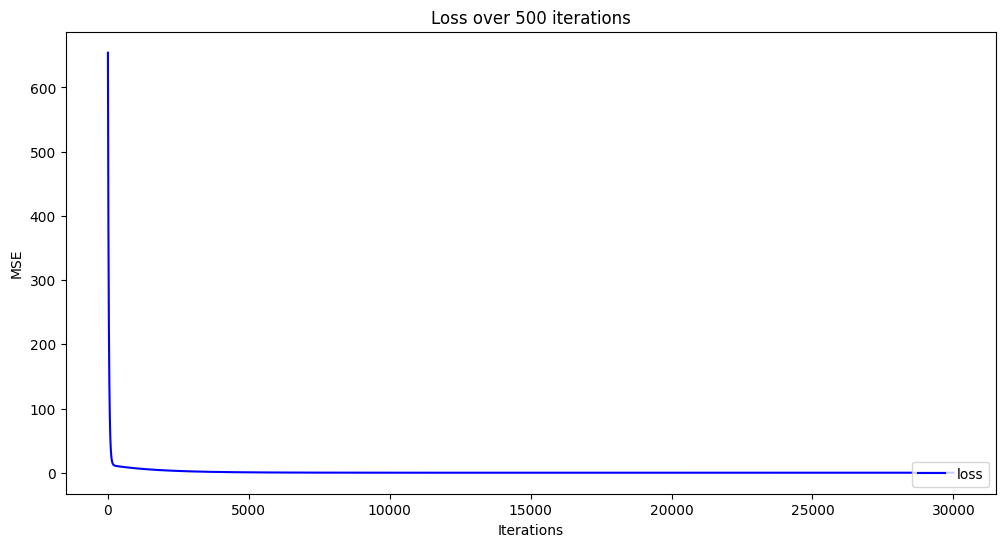

In [85]:
plt.figure(figsize=(12, 6))
plt.plot(GD[3], 'b-', label = 'loss')
# plt.xlim(0,50)
plt.title('Loss over 500 iterations')
plt.legend(loc="lower right")
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.show()